# Analiza oficjalnych wyników WCA

*Data: 17 stycznia 2020* *Autor: Jonatan Kłosko*

Niniejszy dokument ma na celu przedstawienie analizy wyników speedcubingowych uznanych przez oficjalną organizację WCA.

## Kontekst

Speedcubing jest dyscypliną polegającą na układaniu Kostki Rubika oraz innych tego typu łamigłówek w [jak najkrótszym czasie](https://youtu.be/NevGDFBfQGw).

[WCA (World Cube Association)](https://www.worldcubeassociation.org/about) to organizacja odpowiadająca za regulowanie oficjalnych spraw związanych ze speedcubingiem. Zajmuje się między innymi: definiowaniem i ujednolicaniem zasad przeprowadzania zawodów, zapewnianiem poprawnego przebiegu zawodów (przy pomocy reprezentujących ją delegatów), utrzymywaniem oficjalnych rankingów i rekordów oraz prowadzeniu działań mających na celu rozwój speedcubingu.

Zawody WCA odbywają się na całym świecie w każdy weekend, w roku 2019 było ich średnio 25 na tydzień. W tymże roku na zawodach pojawiło się 48 418 różnych osób (średnio 75 zawodników na zawody, 885 na największych z nich), które wykonały łącznie 2 537 840 udanych ułożeń.

Podczas zawodów odbywa się od kilku do kilkunasu spośród 17 oficjalnych konkurencji (między innymi [kostki](https://www.thecubicle.com/pages/wca-puzzles) w rozmiarach od 2x2x2 do 7x7x7, czworościan/dwunastościan foremny, układanie klasycznej kostki jedną ręką, bez patrzenia oraz w jak najmniejszej liczbie ruchów). Dla danej konkurencji może odbywać się od jednej do czterech rund (etapów), do których zawodnicy awansują na podstawie rezultatów uzyskanych z rundzie poprzedniej.

W większości konkurencji podczas rundy zawodnik wykonuje 5 ułożeń (*attempts*), na podstawie których wyróżnia się dwa wskaźniki: najlepsze ułożenie (*best of 5*) oraz średnią obliczaną po odrzuceniu najgorszego i najlepszego wyniku (*average*). Wskaźnikiem determinującym pozycję zawodnika w rundzie jest właśnie średnia.

## Zbiór danych

Analizowane dane pochodzą z [bazy danych WCA](https://www.worldcubeassociation.org/results/misc/export.html). Na potrzeby analizy przygotowano na ich podstawie bazę danych SQLite zawierającą odpowiedni podzbiór danych.

Tabele znajdujące się w bazie:
- `competitions` - zbiór oficjalnych zawodów WCA
- `events` - zbiór konkurencji WCA (kilka z nich nie jest już oficjalna, natomiast występują dla nich wyniki)
- `people` - zbiór zawodników, którzy kiedykolwiek wzięli udział w zawodach
- `results` - zbiór wyników z zawodów (każdy rekord odpowiada rezultatom jednej osoby z jednej rundy, czyli zawiera wszystkie 5 ułożeń)

Głównym przedmiotem poniższej analizy są wyniki (`results`). Istotnym szczegółem jest sposób przechowywania poszczególnych prób. Pola `attempt{n}`, `best` oraz `average` w przypadku większości konkurencji są wyrażone jako liczby całkowite reprezentujące liczbę centysekund (zatem czas `1:10.25 s` jest przechowywany jako liczba `7025`). Dodatkowo wyróżnia się trzy szczególne wartości:
- `0` - oznacza pominięcie próby występujące m.i. w przypadku konkurencji, w których wykonywane jest mniej niż 5 ułożeń
- `-1` - reprezentuje wartość DNF (Did Not Finish) oznaczającą dyskwalifikację ułożenia, która może wynikać z zakończenia ułożenia z nieułożoną łamigłówką lub naruszenia regulaminu
- `-2` - reprezentuje wartość DNS (Did Not Start) oznaczającą celowe niewykonanie przez zawodnika próby, pomimo kwalifikowanie się na nią

Jako że wartości szczególne nie mają sensu liczbowego, są one ignorowane podczas analizy danych.

## Dodatkowe źródła

- [Max Park | How The Rubik's Cube Changed His Life](https://youtu.be/DHgC2Ru7_MQ) - krótki film przedstawiający inspirującą historię jednego z najwybitniejszych zawodników w historii
- [Why We Cube](https://youtu.be/1oZY2e25VUw) - film dokumentalny przezentujący speedcubing z perspektyw interesujących zawodników
- [Rankingi WCA](https://www.worldcubeassociation.org/results/rankings/333/single) - oficjalne rankingi bezpośrednio związane z analizowanymi danymi
- [WCA Statistics](https://jonatanklosko.github.io/wca_statistics) - zbiór wielu rankingów/zestawień wykonanych przeze mnie na podstawie danych WCA

## Przygotowanie środowiska

Załadowanie odpowiednich pakietów oraz połączenie z przygotowaną bazą.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)
connection = sqlite3.connect("data/wca.db")

## Analiza wyników

W pierwszym kroku przyjrzyjmy się rozkładom wyników w klasycznej kostce 3x3x3.

In [3]:
results333 = pd.read_sql_query("SELECT * FROM results WHERE event_id = '333' AND best > 0", connection)

In [4]:
attempt_columns = ["attempt1", "attempt2", "attempt3", "attempt4", "attempt5"]
def complete_attempts(results):
    all_attempts = results[attempt_columns].stack()
    return all_attempts[all_attempts > 0]

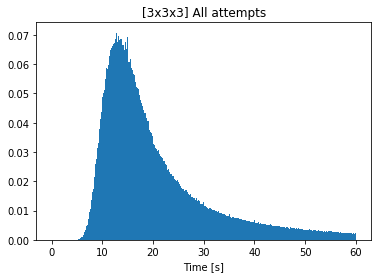

In [5]:
all_333_attempts_s = complete_attempts(results333) / 100
plt.hist(all_333_attempts_s, bins=np.linspace(0, 60, 500), density=True)
plt.title("[3x3x3] All attempts")
plt.xlabel("Time [s]")

plt.show()

In [6]:
stats.skew(all_333_attempts_s)

4.916282508598442

In [7]:
all_333_attempts_s.describe()

count   3484835.00000
mean         23.80672
std          20.27380
min           3.47000
25%          13.09000
50%          17.39000
75%          26.34000
max         908.00000
dtype: float64

In [8]:
all_333_attempts_s.mode()

0   13.56000
dtype: float64

Powyższy histogram przedstawia rozkład czasów wszystkich udanych ułożeń kostki 3x3x3. Rozkład ten jest prawostronnie skośny, czego uzasadnieniem jest fakt, że większość osób rozpoczynających swoją speedcubingową karierę szybko poprawia swoje czasy (zatem kolejne występy w zawodach są lepsze od poprzednich), jednak im lepsze czasy tym wolniej przychodzi ich poprawa. Najczęsciej występującym czasem jest 13.56, a liczba lepszych wyników gwałtownie maleje, ponieważ pokonywanie kolejnych progów czasowych jest stosunkowo trudne w porównaniu z inicjalnym rozwojem i wiele osób zatrzymuje się na tym etapie.

Jako że zazwyczaj czasy w ramach 5 prób nie odbiegają od siebie znacząco, oba wyznaczane dla nich wskaźniki (*best* oraz *average*) mają niemalże identyczny kształt rozkładu:

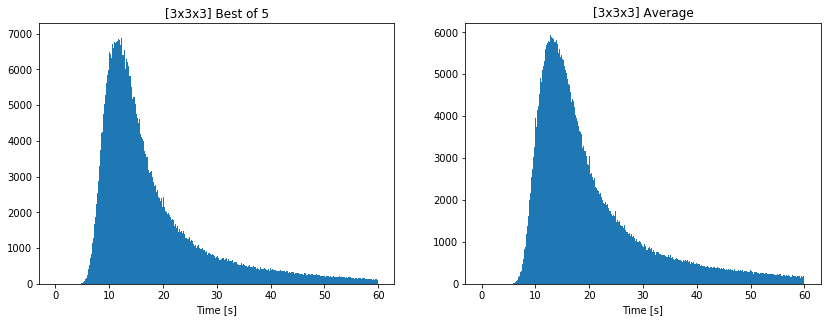

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.8))
ax1.hist(results333.best / 100, bins=np.linspace(0, 60, 500))
ax1.set_title("[3x3x3] Best of 5")
ax1.set_xlabel("Time [s]")
ax2.hist(results333.average[lambda a: a > 0] / 100, bins=np.linspace(0, 60, 500))
ax2.set_title("[3x3x3] Average")
ax2.set_xlabel("Time [s]")
plt.show()

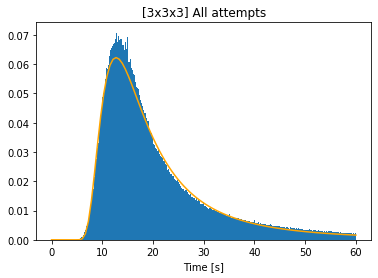

In [147]:
all_333_attempts_s = complete_attempts(results333) / 100
plt.hist(all_333_attempts_s, bins=np.linspace(0, 60, 500), density=True)
plt.title("[3x3x3] All attempts")
plt.xlabel("Time [s]")

# Fit Inverse Weibull distribution using MLE (Maximum Likelihood Estimation)
params = stats.invweibull.fit(all_333_attempts_s.sample(10000))
x = np.linspace(0, 60, 100)
y = stats.invweibull.pdf(x, *params)
plt.plot(x, y, color="orange")

plt.show()

Powyżej znajduje się ponownie histogram wszystkich czasów wraz z dopasowanym do niego rozkładem odwrotnym Weibulla, który w znacznym stopniu pasuje do danych, jednak baganie zgodności dopasowanego rozkładu przy pomocy testu Kołmogorowa-Smirnowa, prowadzi do odrzucenia tej hipotezy.

In [148]:
stats.kstest(all_333_attempts_s, stats.invweibull.cdf, args=params)

KstestResult(statistic=0.014250824983926602, pvalue=0.0)

Zaskakujący rezultat otrzymamy sporządzając tenże histogram, tym razem z dokładnością do setnej sekundy:

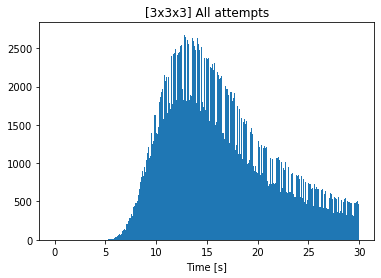

In [12]:
plt.hist(all_333_attempts_s, bins=np.linspace(0, 30, 3000))
plt.title("[3x3x3] All attempts")
plt.xlabel("Time [s]")
plt.show()

Wskazje on jasno, że uzyskanie niektórych czasów jest zdecydowanie bardziej prawdopodobne od pozostałych. Fakt ten jest związany z błędnym funkcjonowaniem stoperów używanych dawniej na zawodach, które skutkowało małym prawdopodobieństwem uzyskania pewnych konkretnych wartości. W celu jasnego pokazania tego zobaczmy analogiczne histogramy dla wyników sprzed 2012 roku oraz po 2016.

In [13]:
results333_old = pd.read_sql_query("""
    SELECT results.* FROM results
    JOIN competitions
    ON competitions.id = competition_id
    WHERE event_id = '333' AND best > 0 AND start_date < '2012-01-01'
""", connection)
results333_recent = pd.read_sql_query("""
    SELECT results.* FROM results
    JOIN competitions
    ON competitions.id = competition_id
    WHERE event_id = '333' AND best > 0 AND start_date >= '2017-01-01'
""", connection)

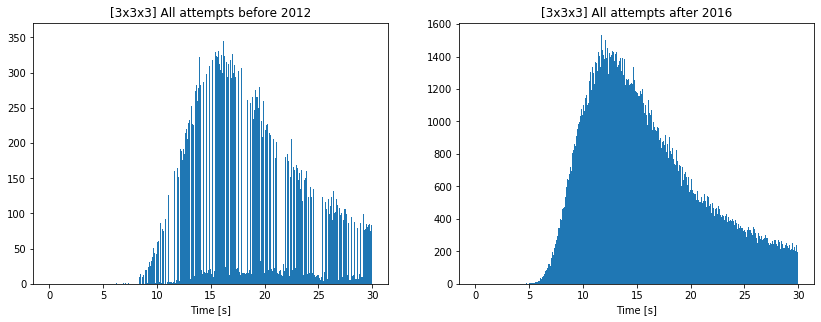

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.8))
ax1.hist(complete_attempts(results333_old) / 100, bins=np.linspace(0, 30, 3000))
ax1.set_title("[3x3x3] All attempts before 2012")
ax1.set_xlabel("Time [s]")
ax2.hist(complete_attempts(results333_recent) / 100, bins=np.linspace(0, 30, 3000))
ax2.set_title("[3x3x3] All attempts after 2016")
ax2.set_xlabel("Time [s]")
plt.show()

Stopery nowszej generacji nie posiadają omawianej wady, co wiecej mierzą one czasy z precyzją jednej tysięcznej sekundy, jednak w celu zachowania spójności wyniki nadal rejestruje się z dokładnością do jednej setnej.

Przyjrzyjmy się teraz macierzy korelacji wyniku (z przyczyn omawianych wcześniej pomijamy wyniki mające co najmniej jedną próbe o niedodatniej wartości).

In [15]:
results_with_complete_attempts = results333[(results333[attempt_columns] > 0).all(axis=1)]
results_with_complete_attempts.corr()

,id,ranking,is_final,attempt1,attempt2,attempt3,attempt4,attempt5,best,average
id,1.00000,0.11345,-0.04749,-0.07776,-0.07904,-0.07914,-0.08052,-0.07946,-0.08734,-0.08318
ranking,0.11345,1.00000,-0.19440,0.29266,0.29524,0.29708,0.29803,0.29794,0.31723,0.31579
is_final,-0.04749,-0.19440,1.00000,-0.16193,-0.16395,-0.16358,-0.16408,-0.16323,-0.17704,-0.17425
attempt1,-0.07776,0.29266,-0.16193,1.00000,0.87289,0.87428,0.87462,0.87377,0.92615,0.94260
attempt2,-0.07904,0.29524,-0.16395,0.87289,1.00000,0.87618,0.87698,0.87563,0.93148,0.94446
attempt3,-0.07914,0.29708,-0.16358,0.87428,0.87618,1.00000,0.87710,0.87631,0.93130,0.94527
attempt4,-0.08052,0.29803,-0.16408,0.87462,0.87698,0.87710,1.00000,0.88040,0.93521,0.94704
attempt5,-0.07946,0.29794,-0.16323,0.87377,0.87563,0.87631,0.88040,1.00000,0.93391,0.94580
best,-0.08734,0.31723,-0.17704,0.92615,0.93148,0.93130,0.93521,0.93391,1.00000,0.98384
average,-0.08318,0.31579,-0.17425,0.94260,0.94446,0.94527,0.94704,0.94580,0.98384,1.00000


Jak widać wartości poszczególnych prób wykazują silną zależność, co wynika z faktu, że w momencie wykonywania danych 5 ułożeń osoba jest na konkretnym poziomie i osiąga zbliżone do siebie czasy.

Korelacja rankingu oraz wskaźników nie jest wysoka, poniważ ranking wskazuje pozycję uzyskaną na konkretnych zawodach. Na zawodach o wysokim poziomie uzyskanie rankingu kwalifikującego do kolejnej rundy może wymagać czasów, które pozwoliłby na wygranie innych zawodów.

Porównajmy histogramy analogiczne do wcześniejszych dla większych łamigłówek:

In [16]:
results = pd.read_sql_query("SELECT * FROM Results WHERE best > 0", connection)

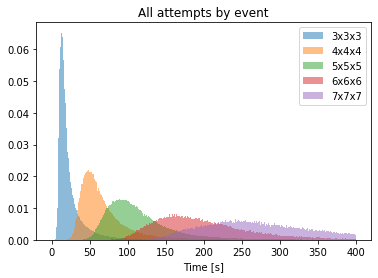

In [17]:
plt.hist(complete_attempts(results[results.event_id == "333"]) / 100, bins=np.linspace(0, 400, 500), density=True, alpha=0.5, label="3x3x3")
plt.hist(complete_attempts(results[results.event_id == "444"]) / 100, bins=np.linspace(0, 400, 500), density=True, alpha=0.5, label="4x4x4")
plt.hist(complete_attempts(results[results.event_id == "555"]) / 100, bins=np.linspace(0, 400, 500), density=True, alpha=0.5, label="5x5x5")
plt.hist(complete_attempts(results[results.event_id == "666"]) / 100, bins=np.linspace(0, 400, 500), density=True, alpha=0.5, label="6x6x6")
plt.hist(complete_attempts(results[results.event_id == "777"]) / 100, bins=np.linspace(0, 400, 500), density=True, alpha=0.5, label="7x7x7")
plt.legend(loc="upper right")
plt.title("All attempts by event")
plt.xlabel("Time [s]")
plt.show()

Łatwo dostrzec, że wszytkie z powyższych rozkładów cechują się parwoskośnością. Wraz z rozmiarem kostki są coraz bardziej rozpięte, co wynika z faktu, że wraz z wydłużeniem czasu potrzebnego na ułożenie łamigłówki, rośnie różnież zakres czasów jaki osiąga osoba na konkretnym poziomie (jedna sekunda w przypadku kostki 3x3x3 jest niezmiernie istotna w porównaniu z jedną sekundą w przypadku 7x7x7).

Zbadajmy związek pomiędzy rekordem osobistym a liczbą zawodów, w których brało się udział.

In [18]:
competitions_and_best_by_person = pd.read_sql_query("SELECT person_id, COUNT(DISTINCT competition_id) competitions, MIN(best) personal_best FROM results WHERE event_id = '333' AND best > 0 AND best < 6000 GROUP BY person_id", connection)

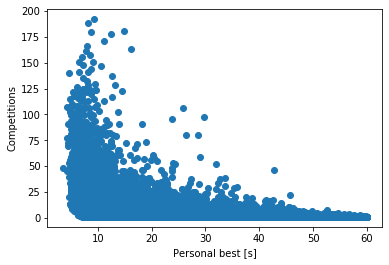

In [19]:
plt.scatter(competitions_and_best_by_person.personal_best / 100, competitions_and_best_by_person.competitions)
plt.xlabel("Personal best [s]")
plt.ylabel("Competitions")
plt.show()

In [20]:
competitions_and_best_by_person.corr()

,competitions,personal_best
competitions,1.00000,-0.32581
personal_best,-0.32581,1.00000


Współczynnik korelacji wskazanych zmiennych jest oczywiście ujemny, ponieważ aby poprawić swoje wyniki kolejny raz trzeba odwiedzić kolejne zawody. Natomiast związek ten nie wydaje się być silny, prawdopodobnie dlatego, że na pewnym poziomie poprawianie swoich rekordów staje się trudniejsze i dlatego uczestniczenie w kolejnych zawodach nie implikuje poprawienia swoich wyników.

W tym kontekście, przyjrzyjmy się rozkładowi liczby zawodów w jakich uczestniczą zawodnicy.

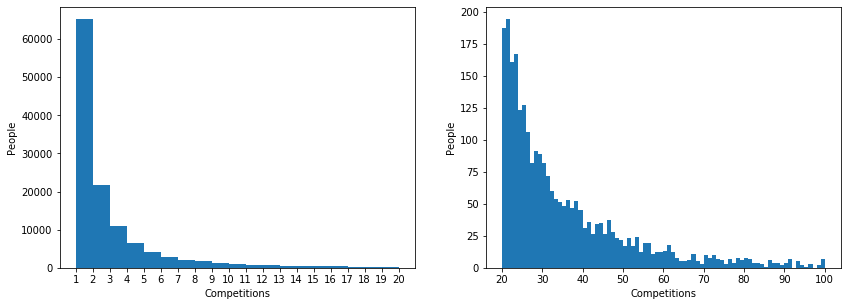

In [21]:
competitions = competitions_and_best_by_person.competitions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.8))
ax1.hist(competitions[lambda c: c < 20], bins=range(1, 21))
ax1.set_xlabel("Competitions")
ax1.set_ylabel("People")
ax1.set_xticks(range(1, 21))
ax2.hist(competitions[lambda c: c >= 20], bins=range(20, 101))
ax2.set_xlabel("Competitions")
ax2.set_ylabel("People")
plt.show()

Obserwujemy wyraźny spadek liczby odwiedzonych zawodów, co oznacza że większość osób uczestniło w zaledwie kilku (zazwyczaj jednych) zawodach. Fakt ten wynikać może z wielu czynników, między innymi dostępności zawodów w danym kraju.

Wielkość zawodów została zobrazowana ponizej:

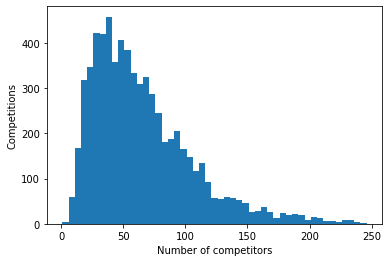

In [22]:
competition_sizes = pd.read_sql_query("SELECT COUNT(DISTINCT person_id) competitors FROM results GROUP BY competition_id", connection)
plt.hist(competition_sizes.competitors[lambda x: x < 250], bins=range(1, 251, 5))
plt.xlabel("Number of competitors")
plt.ylabel("Competitions")
plt.show()

In [23]:
competition_sizes.competitors.describe()

count   6758.00000
mean      68.34877
std       55.29249
min        2.00000
25%       35.00000
50%       56.00000
75%       87.00000
max      955.00000
Name: competitors, dtype: float64

Średnio w zawodach uczestniczy 68 osób, natomiast wysoka wartość odchylenia standardowego wskazuje na spore zróżnicowanie w tym zakresie. Największymi zawodami w historii były [Mistrzostwa Azji 2016](https://www.worldcubeassociation.org/competitions/AsianChampionship2016) liczące 955 zawodników.

Spójrzmy na kilka zmiennych opisujących kraje:

In [24]:
countries = pd.read_sql_query("""
    SELECT
        COUNT(DISTINCT competition_id) competitions,
        COUNT(DISTINCT person_id) competitors,
        SUM(
            CASE regional_single_record WHEN 'NULL' THEN 0 ELSE 1 END
            +
            CASE regional_average_record WHEN 'NULL' THEN 0 ELSE 1 END
        ) records
    FROM results
    JOIN people ON people.id = person_id
    GROUP BY country
""", connection)

In [25]:
countries.corr()

,competitions,competitors,records
competitions,1.00000,0.89337,0.79697
competitors,0.89337,1.00000,0.54404
records,0.79697,0.54404,1.00000


Widzimy, że liczba zawodów przekłada się bezpośrednio na liczbę zawodników z danego kraju (co pośrednio oznacza, że na zawodach pojawia się zwykle sporo nowych osób). Ponadto, liczba pobitych rekordów (kraju, kontynentu lub świata) jest również silnie zależna od liczby zawodów, ponieważ więcej zawodów daje naturalnie więcej okazji na pobicie rekordów. Dodatkowo większa liczba zawodów może implikować wiekszy poziom rozwoju danego kraju (w sensie speedcubingowym), a zatem większą szanse na pobicie rekordów.

Zależność liczby zawodników od zawodów pokazana została na wykresie ponizej.

a: 9.139, b: -550.829, r: 0.893


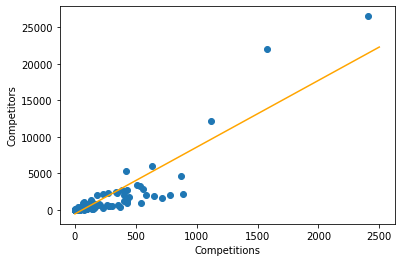

In [207]:
plt.scatter(countries.competitions, countries.competitors)
plt.xlabel("Competitions")
plt.ylabel("Competitors")

# Fit a line using least-squares regression.
a, b, rvalue, _, _ = stats.linregress(countries.competitions, countries.competitors)
print("a: {:.3f}, b: {:.3f}, r: {:.3f}".format(a, b, rvalue))
x = np.linspace(0, 2500, 100)
y = x * a + b
plt.plot(x, y, color="orange")

plt.show()

Zbadajmy zależność uzyskiwanych wyników od płci. Warto zaznaczyć, że kobiety stanowią jedynie `10%` zawodników, jednak ich liczność w wysokości 14 660 wydaje się wystarczająco reprezentatywna, by uzasadnione było badanie wspomnianego związku.

In [187]:
results333_with_gender = pd.read_sql_query("""
    SELECT results.*, gender
    FROM results
    JOIN people ON people.id = results.person_id
    WHERE event_id = '333' AND best > 0 AND gender IN ('m', 'f')
""", connection)

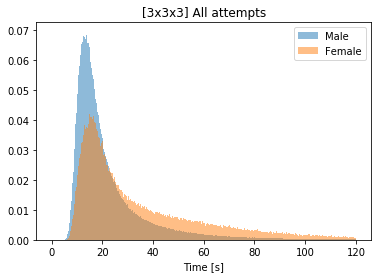

In [188]:
male_attempts_s = complete_attempts(results333_with_gender[results333_with_gender.gender == "m"]) / 100
female_attempts_s = complete_attempts(results333_with_gender[results333_with_gender.gender == "f"]) / 100
plt.hist(male_attempts_s, bins=np.linspace(0, 120, 500), density=True, alpha=0.5, label="Male")
plt.hist(female_attempts_s, bins=np.linspace(0, 120, 500), density=True, alpha=0.5, label="Female")
plt.legend(loc="upper right")
plt.title("[3x3x3] All attempts")
plt.xlabel("Time [s]")
plt.show()

In [189]:
mf_results = results333_with_gender[results333_with_gender.gender.isin(["m", "f"])]
mf_results.groupby("gender").apply(lambda results: (complete_attempts(results) / 100).describe())

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
f,242104.00000,38.18087,34.34872,4.44000,16.60000,25.75000,48.77000,908.00000
m,3237817.00000,22.72103,18.32812,3.47000,12.94000,17.05000,25.27000,790.00000


Jak widać dotychczasowe wyniki kobiet w klasycznej kostce 3x3x3 są w ogólności wyraźnie słabsze oraz bardziej zróżnicowane (cechują się prawie drukrotnie większym odchyleniem standardowym).

W kolejnym kroku rozszerzmy badanie tej zależności o inne konkurencje. W tym celu dla każdej z konkurencji obliczamy średni czas kobiet oraz średni czas mężczyzn i reprezentujemy jako punkt na wykresie.

In [190]:
results_with_gender = pd.read_sql_query("""
    SELECT results.*, gender
    FROM Results
    JOIN people ON people.id = person_id
    WHERE best > 0 AND event_id NOT IN ('333mbf', '333mbo', '333fm') AND gender IN ('m', 'f')
""", connection)

In [202]:
means_by_gender = r.groupby(["event_id", "gender"]).apply(
    lambda results: pd.Series({ "attempts_mean": complete_attempts(results).mean() })
).reset_index()

a: 1.228, b: -8.294, r: 0.999


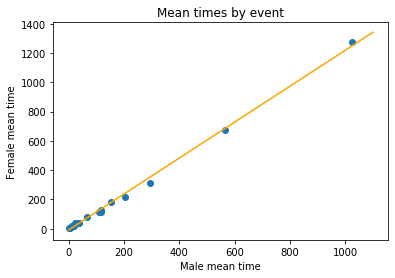

In [208]:
male_means_s = means_by_gender[means_by_gender.gender == "m"].attempts_mean / 100
female_means_s = means_by_gender[means_by_gender.gender == "f"].attempts_mean / 100
plt.scatter(male_means_s, female_means_s)
plt.title("Mean times by event")
plt.xlabel("Male mean time")
plt.ylabel("Female mean time")

# Fit a line using least-squares regression.
a, b, rvalue, _, _ = stats.linregress(male_means_s, female_means_s)
print("a: {:.3f}, b: {:.3f}, r: {:.3f}".format(a, b, rvalue))
x = np.linspace(0, 1100, 100)
y = x * a + b
plt.plot(x, y, color="orange")

plt.show()

Jak widać zależność jest niemalże idealnie liniowa (współczynnik korelacji ≈ 1). Istotnym parametrem jest nachylenie prostej wynoszące `1.228`, co oznacza, że niezależnie od konkurencji kobiety są średnio o `22.8%` wolniejsze od mężczyzn.